In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [154]:
path = '/Users/ivananohin/Documents/robot_learning/hw1/data/'

In [301]:
exp_name = 'q1_logprobe_seed1_HalfCheetah-v2_24-01-2024_22-37-26' #'q1_idm_logprobe_seed1_HalfCheetah-v2_24-01-2024_22-38-21' #'q1_logprobe_seed2_Ant-v2_24-01-2024_22-02-04' #'q1_idm_logprobe_seed2_Ant-v2_24-01-2024_22-08-19' #'Humanoid_dagger'#'q2_logprobe_seed3_it20_Humanoid-v2_25-01-2024_00-08-18' #'q1_idm_logprobe_seed2_Ant-v2_24-01-2024_22-08-19' #'q1_logprobe_seed1_Humanoid-v2_24-01-2024_23-00-13' #'q1_logprobe_seed1_Ant-v2_24-01-2024_22-01-26' #'q1_logprobe_seed3_Ant-v2_24-01-2024_22-03-04' #'q1_logprobe_seed1_Ant-v2_24-01-2024_22-01-26' #'q1_logprobe_seed2_Ant-v2_24-01-2024_22-02-04' #'q1_logprobe_seed1_Ant-v2_24-01-2024_22-01-26'#'q2_logprobe_seed3_it20_Humanoid-v2_25-01-2024_00-08-18'
df = pd.read_csv(path+exp_name+'/log_data.csv')

In [302]:
df.T

,0
train_ep_lens_Average,1000.000000
train_ep_lens_Std,0.000000
train_ep_lens_Median,1000.000000
train_ep_lens_Min,1000.000000
train_ep_lens_Max,1000.000000
eval_ep_lens_Average,1000.000000
eval_ep_lens_Std,0.000000
eval_ep_lens_Median,1000.000000
eval_ep_lens_Min,1000.000000
eval_ep_lens_Max,1000.000000


In [293]:
# df[['eval_reward_Average', 'eval_reward_Std', 'reward_Average', 'reward_Std']]

In [294]:
# exp_name = 'q1_logprobe_seed1_Ant-v2_24-01-2024_22-01-26' #'q1_logprobe_seed2_Ant-v2_24-01-2024_22-02-04' #'q1_logprobe_seed1_Ant-v2_24-01-2024_22-01-26'#'q2_logprobe_seed3_it20_Humanoid-v2_25-01-2024_00-08-18'
# df = pd.read_csv(path+exp_name+'/log_data.csv')

In [295]:
# df[['reward_Average', 'reward_Std']]

In [296]:
df2latex = df[['eval_reward_Average', 'eval_reward_Std', 'reward_Average', 'reward_Std', 'eval_returns_Average', 'train_returns_Average', 'eval_returns_Std']]
print(df2latex.to_latex(index=True, formatters={"name": str.upper}, float_format="{:.1f}".format,))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  eval\_reward\_Average &  eval\_reward\_Std &  reward\_Average &  reward\_Std &  eval\_returns\_Average &  train\_returns\_Average &  eval\_returns\_Std \\
\midrule
0 &                  4.0 &              1.1 &             4.1 &         1.1 &                3998.8 &                 4139.9 &              85.0 \\
\bottomrule
\end{tabular}



/var/folders/fj/fh1rqf8s10g33k9dkdmphrg80000gn/T/ipykernel_31766/3396169863.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df2latex.to_latex(index=True, formatters={"name": str.upper}, float_format="{:.1f}".format,))


In [297]:
df2latex['eval_reward_Average'].to_numpy()

array([3.9987535])

In [298]:
np.arange(len(df2latex['eval_returns_Average'].to_numpy()))

array([0])

In [278]:
df2latex['eval_returns_Std'].to_numpy()

array([48.339966])

In [279]:
df2latex['eval_returns_Average'].to_numpy()

array([4719.2036])

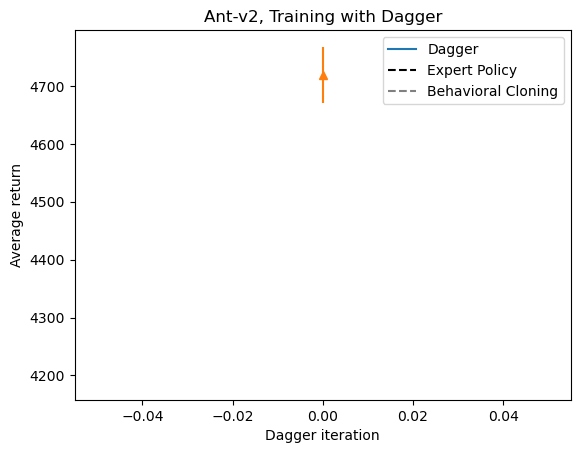

In [280]:
x = np.arange(len(df['eval_returns_Average'].to_numpy()))
plt.plot(x, df['eval_returns_Average'].to_numpy(), label='Dagger')
plt.plot(x, df['Initial_DataCollection_AverageReturn'], '--', c='black', label='Expert Policy')
plt.plot(x, [4187] * len(x), '--', c='grey', label='Behavioral Cloning')
plt.errorbar(x, df['eval_returns_Average'].to_numpy(), df['eval_returns_Std'].to_numpy(), linestyle='None', marker='^')
plt.xlabel('Dagger iteration')
plt.ylabel('Average return')
plt.title('Ant-v2, Training with Dagger')
plt.legend()

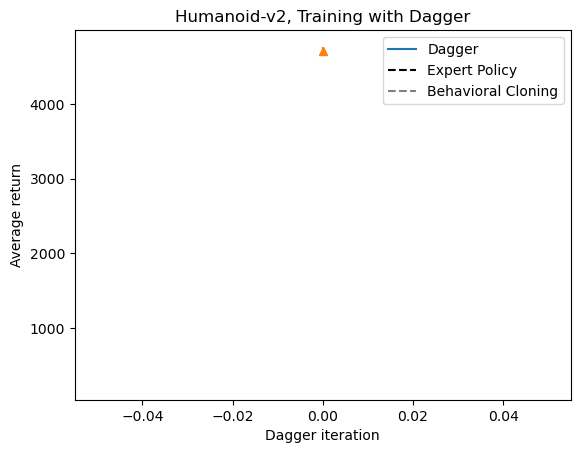

In [281]:
x = np.arange(len(df['eval_returns_Average'].to_numpy()))
plt.plot(x, df['eval_returns_Average'].to_numpy(), label='Dagger')
plt.plot(x, df['Initial_DataCollection_AverageReturn'], '--', c='black', label='Expert Policy')
plt.plot(x, [261] * len(x), '--', c='grey', label='Behavioral Cloning')
plt.errorbar(x, df['eval_returns_Average'].to_numpy(), df['eval_returns_Std'].to_numpy(), linestyle='None', marker='^')
plt.xlabel('Dagger iteration')
plt.ylabel('Average return')
plt.title('Humanoid-v2, Training with Dagger')
plt.legend()

In [282]:
bc = [100, 200, 500, 1000, 2000]
eval_reward_Average	= [4.2, 4.59805, 4.74603, 4.71058, 4.36421]
eval_reward_Std = [1.7, 1.08915, 0.967086, 0.976279, 1.45463]

Text(0, 0.5, 'average reward')

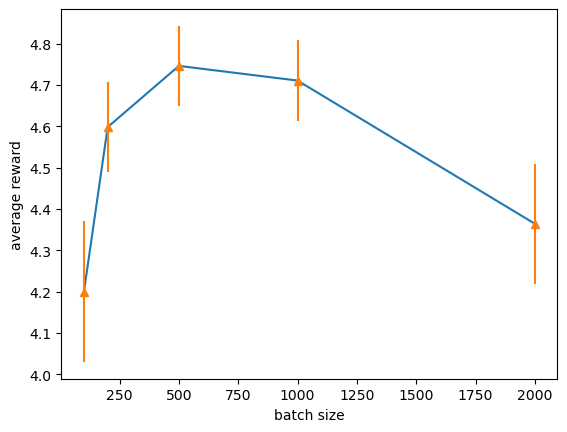

In [117]:
plt.plot(bc, eval_reward_Average)
plt.errorbar(bc, eval_reward_Average, 0.1*np.array(eval_reward_Std), linestyle='None', marker='^')
plt.xlabel('batch size')
plt.ylabel('average reward')

<ErrorbarContainer object of 3 artists>

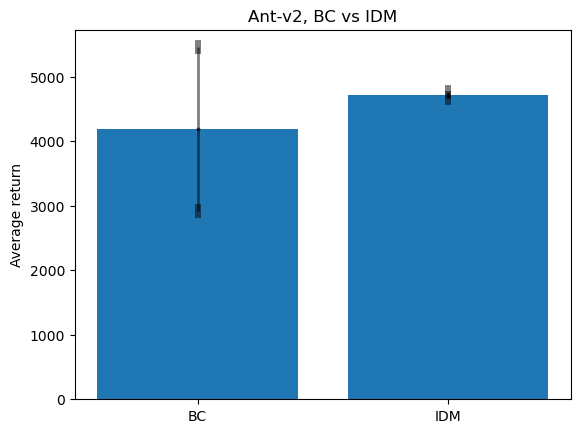

In [290]:
plt.bar(['BC', 'IDM'], height=[4187, 4719.2])
plt.ylabel('Average return')
plt.title('Ant-v2, BC vs IDM')
plt.errorbar([0, 1], [4187, 4719.2], [1266.558500, 48.339966], fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)

<ErrorbarContainer object of 3 artists>

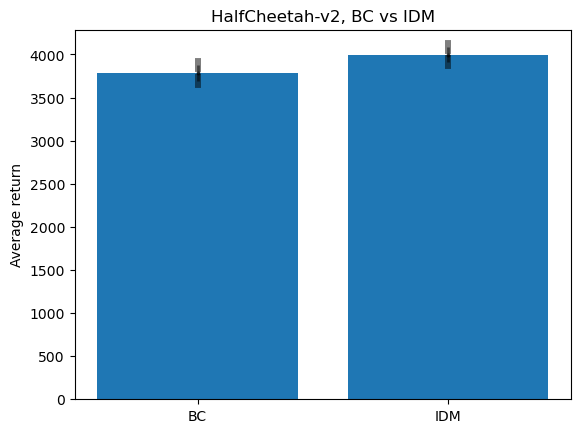

In [305]:
plt.bar(['BC', 'IDM'], height=[3785.514200, 3998.753700])
plt.ylabel('Average return')
plt.title('HalfCheetah-v2, BC vs IDM')
plt.errorbar([0, 1], [3785.514200, 3998.753700], [89.415886, 84.965360], fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)